# Ridge Regression (gradient descent)

* a Numpy function to compute the derivative of the regression weights with respect to a single feature
* A gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

In [1]:
import turicreate

In [3]:
sales = turicreate.SFrame('home_data.sframe/')

In [4]:
import numpy as np 

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 
    
    features = ['constant'] + features
    
    features_sframe = data_sframe[features] 
    
    feature_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output] 
    
    output_array = output_sarray.to_numpy()
    
    return(feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [7]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    
    derivative = 0
    if feature_is_constant==True:
        derivative = 2*np.dot(errors,feature)
    else:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
        
    return derivative

# Gradient Descent

For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.

In [8]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) 
    iteration = 0
    print_frequency = 1  
    
    while iteration <= max_iterations:
        iteration += 1 
        
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
            
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        if iteration%print_frequency==0:
            print('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        
        for i in range(len(weights)): 
            
            if i==0:
                wi = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,True)
            else:
                wi = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,False)
            
            weights[i] = weights[i] - step_size*wi
            
    print('Done with gradient descent at iteration ', iteration)
    print('Learned weights = ', str(weights))
    return weights

# Visualizing effect of L2 penalty

In [9]:
simple_features = ['sqft_living']
my_output = 'price'

In [10]:
train_data,test_data = sales.random_split(.8,seed=0)

In [13]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [14]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [15]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, 
                                                             step_size, l2_penalty, max_iterations)


Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5394267213135526.0
Iteration = 3
Cost function =  4023237736501159.0
Iteration = 4
Cost function =  3101256183922414.5
Iteration = 5
Cost function =  2481247644505113.5
Iteration = 6
Cost function =  2064308077891941.5
Iteration = 7
Cost function =  1783927097372279.5
Iteration = 8
Cost function =  1595378203154871.8
Iteration = 9
Cost function =  1468583991054997.2
Iteration = 10
Cost function =  1383318191484981.8
Iteration = 20
Cost function =  1211562140496239.0
Iteration = 30
Cost function =  1208313762678823.0
Iteration = 40
Cost function =  1208252326252869.8
Iteration = 50
Cost function =  1208251163612919.5
Iteration = 60
Cost function =  1208251140915263.0
Iteration = 70
Cost function =  1208251139777036.0
Iteration = 80
Cost function =  1208251139046557.0
Iteration = 90
Cost function =  1208251138323789.0
Iteration = 100
Cost function =  1208251137

In [16]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights,
                                                                step_size, l2_penalty, max_iterations)


Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5618303898412631.0
Iteration = 3
Cost function =  4920613278115385.0
Iteration = 4
Cost function =  4652381942612294.0
Iteration = 5
Cost function =  4549258764014158.0
Iteration = 6
Cost function =  4509612390882265.0
Iteration = 7
Cost function =  4494370050281118.0
Iteration = 8
Cost function =  4488509984030220.5
Iteration = 9
Cost function =  4486256988531770.0
Iteration = 10
Cost function =  4485390752674688.0
Iteration = 20
Cost function =  4484848868034299.0
Iteration = 30
Cost function =  4484847880479027.0
Iteration = 40
Cost function =  4484846931081658.0
Iteration = 50
Cost function =  4484845981687379.5
Iteration = 60
Cost function =  4484845032293499.5
Iteration = 70
Cost function =  4484844082900019.0
Iteration = 80
Cost function =  4484843133506937.0
Iteration = 90
Cost function =  4484842184114254.5
Iteration = 100
Cost function = 

This code will plot the two learned models.  (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

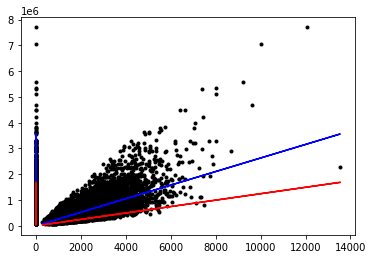

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Computing the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

In [18]:
initw = ((test_output - predict_output(simple_test_feature_matrix,initial_weights))**2).sum()
initw

1784273282524564.0

In [19]:
nopenalty = ((test_output - predict_output(simple_test_feature_matrix,simple_weights_0_penalty))**2).sum()
nopenalty

275723634587181.94

In [20]:
highpenalty = ((test_output - predict_output(simple_test_feature_matrix,simple_weights_high_penalty))**2).sum()
highpenalty

694642088704277.8

In [21]:
np.shape(simple_weights_0_penalty)
simple_weights_0_penalty[0,]


a = np.array([[1],[2]])
type(a)
np.shape(a)

round(simple_weights_0_penalty[1],1)
# simple_weights_0_penalty[1]
# round(simple_weights_high_penalty[1],1)

263.0

# Running a multiple regression with L2 penalty

In [22]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [23]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [24]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                                                step_size, l2_penalty, max_iterations)


Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4056752331500973.0
Iteration = 3
Cost function =  2529565114333592.0
Iteration = 4
Cost function =  1838556694275926.8
Iteration = 5
Cost function =  1525675575208603.5
Iteration = 6
Cost function =  1383789498674793.8
Iteration = 7
Cost function =  1319232606276634.5
Iteration = 8
Cost function =  1289648872028920.8
Iteration = 9
Cost function =  1275884724079266.8
Iteration = 10
Cost function =  1269278807577156.8
Iteration = 20
Cost function =  1257812386316614.8
Iteration = 30
Cost function =  1251954571266786.0
Iteration = 40
Cost function =  1246755423155437.5
Iteration = 50
Cost function =  1242139508748821.0
Iteration = 60
Cost function =  1238041401137188.0
Iteration = 70
Cost function =  1234403013463993.5
Iteration = 80
Cost function =  1231172774976820.2
Iteration = 90
Cost function =  1228304900059555.0
Iteration = 100
Cost function =  1225758739

In [25]:
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                                                step_size, l2_penalty, max_iterations)


Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4460489790285892.0
Iteration = 3
Cost function =  3796674468844608.5
Iteration = 4
Cost function =  3648319530437361.0
Iteration = 5
Cost function =  3615091103216103.0
Iteration = 6
Cost function =  3607602742514732.0
Iteration = 7
Cost function =  3605886322161656.0
Iteration = 8
Cost function =  3605474874533295.5
Iteration = 9
Cost function =  3605365167765576.0
Iteration = 10
Cost function =  3605329402184649.0
Iteration = 20
Cost function =  3605294281022695.0
Iteration = 30
Cost function =  3605293537267099.5
Iteration = 40
Cost function =  3605293082749905.0
Iteration = 50
Cost function =  3605292631106358.0
Iteration = 60
Cost function =  3605292179491500.5
Iteration = 70
Cost function =  3605291727877070.0
Iteration = 80
Cost function =  3605291276262785.0
Iteration = 90
Cost function =  3605290824648642.5
Iteration = 100
Cost function = 

Computing the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization


In [26]:
# initial 0

((test_output - predict_output(test_feature_matrix,initial_weights))**2).sum()


1784273282524564.0

In [27]:
# 0 penalty

((test_output - predict_output(test_feature_matrix,multiple_weights_0_penalty))**2).sum()


274067694347184.56

In [28]:
# high penalty

((test_output - predict_output(test_feature_matrix,multiple_weights_high_penalty))**2).sum()


500404796858030.0

In [29]:
predict_output(test_feature_matrix,multiple_weights_0_penalty)[0]

387464.69361981156

In [30]:
predict_output(test_feature_matrix,multiple_weights_high_penalty)[0]

270453.53412973066

In [31]:
test_output[0]

310000.0

In [32]:
print(abs(test_output[0]-predict_output(test_feature_matrix,multiple_weights_high_penalty)[0]))   #-----> high

print(abs(test_output[0]-predict_output(test_feature_matrix,multiple_weights_0_penalty)[0]))

39546.46587026934
77464.69361981156


In [33]:
round(multiple_weights_0_penalty[1],1)

243.1